In [1]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

#import numpy as np
#from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(os.path.join("dataset/data_cleanMetro.csv"))
df.head()

,CONTROL,OMB13CBSA,METRO_STATUS,MARKETVAL,TOTROOMS,YRBUILT,BLD,UNITSIZE,BEDROOMS,BATHROOMS,PORCH,LOTSIZE,RATINGHS,RATINGNH,NHQSCHOOL,NHQSCRIME
0,11000001,37980,2,307811,8,2000,2,6,3,4,1,2,10,10,1,2
1,11000002,99998,1,1005540,7,1970,3,8,3,4,1,7,10,10,1,2
2,11000005,99998,1,229992,8,1970,2,6,4,5,1,5,8,8,1,2
3,11000006,99998,1,132220,5,1980,2,4,3,3,1,3,10,10,1,2
4,11000007,37980,2,271584,8,1960,2,7,4,4,1,2,7,7,2,2


In [3]:
target = df["METRO_STATUS"]
target_names = ["Non-Metro Area", "Other Metro Area", "Select Metro Area"]

In [4]:
data = df.drop("METRO_STATUS", axis=1)
feature_names = data.columns
data.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,BLD,UNITSIZE,BEDROOMS,BATHROOMS,PORCH,LOTSIZE,RATINGHS,RATINGNH,NHQSCHOOL,NHQSCRIME
0,11000001,37980,307811,8,2000,2,6,3,4,1,2,10,10,1,2
1,11000002,99998,1005540,7,1970,3,8,3,4,1,7,10,10,1,2
2,11000005,99998,229992,8,1970,2,6,4,5,1,5,8,8,1,2
3,11000006,99998,132220,5,1980,2,4,3,3,1,3,10,10,1,2
4,11000007,37980,271584,8,1960,2,7,4,4,1,2,7,7,2,2


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=200)

k: 1, Train/Test Score: 1.000/0.848
k: 3, Train/Test Score: 0.920/0.865
k: 5, Train/Test Score: 0.906/0.870
k: 7, Train/Test Score: 0.899/0.871
k: 9, Train/Test Score: 0.897/0.876
k: 11, Train/Test Score: 0.894/0.879
k: 13, Train/Test Score: 0.892/0.881
k: 15, Train/Test Score: 0.892/0.884
k: 17, Train/Test Score: 0.890/0.882
k: 19, Train/Test Score: 0.889/0.881


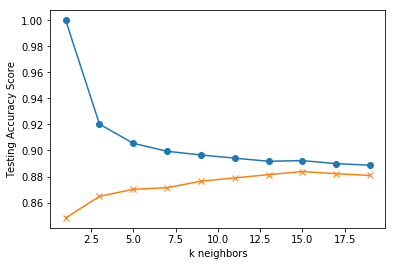

In [6]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker='x')
plt.xlabel('k neighbors')
plt.ylabel('Testing Accuracy Score')
plt.show()

In [8]:
#Note that k: 19 seems to be the best choise for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test, y_test))

k=19 Test Acc: 0.881
